🚀 LINEAR REGRESSION FROM SCRATCH - COMPLETE WORKFLOW
📊 Dataset: Ecommerce Customers
🎯 Objective: Predict Yearly Amount Spent

STEP 1: DATA PREPARATION
LOADING AND CLEANING ECOMMERCE CUSTOMERS DATASET
✓ Successfully loaded dataset from 'Ecommerce-Customers.csv'
✓ Original dataset shape: (500, 8)
✓ Missing values in numeric columns: 0
✓ Removing outliers using z-score threshold: 3
✓ Outliers removed: 8 (1.6%)
✓ Clean dataset shape: (492, 8)
✓ Data split - Train: 393 samples, Test: 99 samples
✓ Features scaled using StandardScaler

Feature Statistics (after cleaning):
----------------------------------------
       Avg. Session Length  Time on App  Time on Website  \
count               492.00       492.00           492.00   
mean                 33.04        12.06            37.07   
std                   0.97         0.96             1.00   
min                  30.39         9.32            34.48   
25%                  32.34        11.39            36.36   
50%                  33.08 

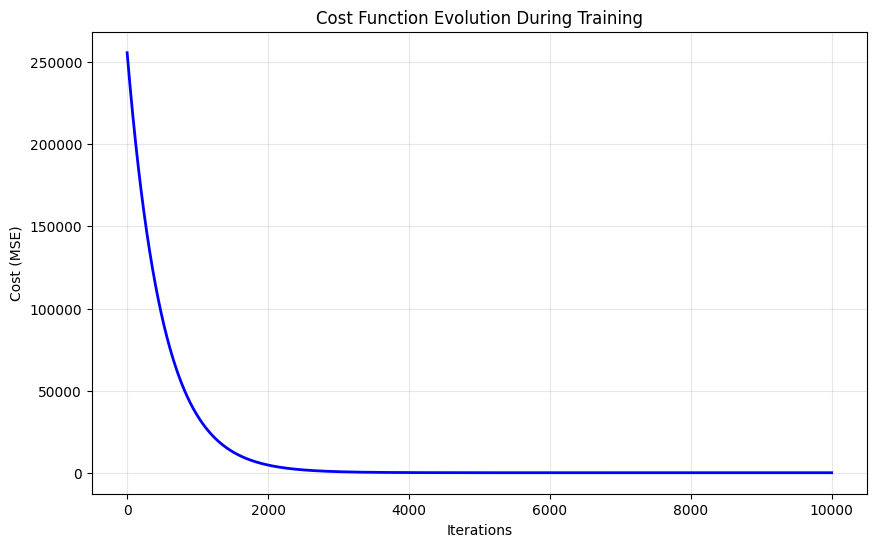

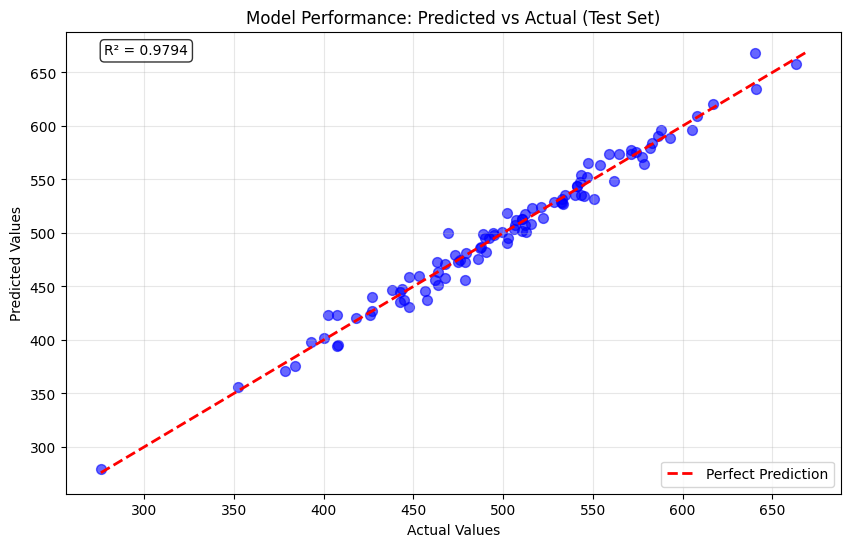

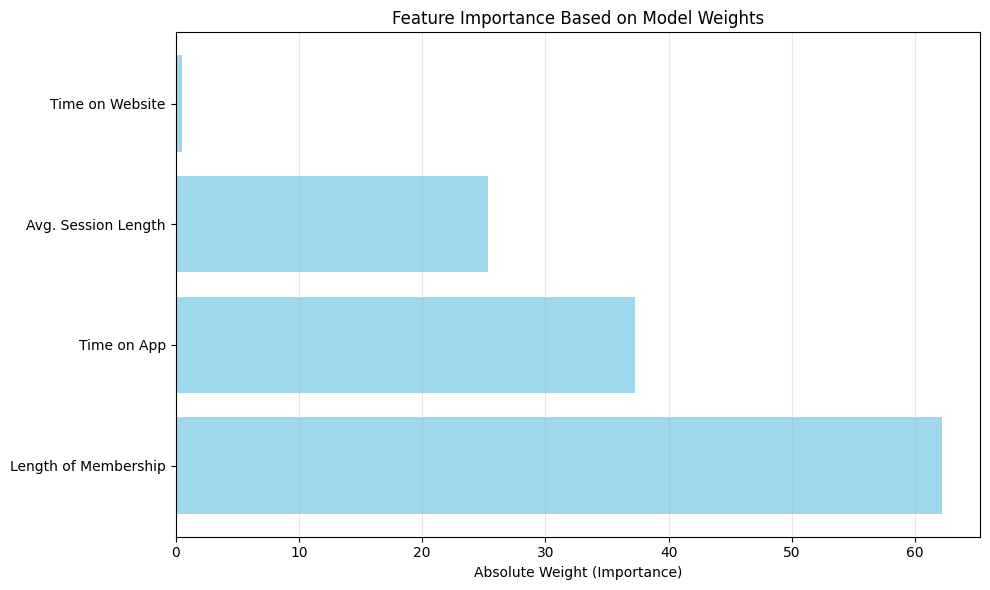


STEP 8: BUSINESS INSIGHTS
💡 Key Insights from the Model:
-----------------------------------
• Most influential factor: Length of Membership
  Impact: 62.15 units per standard deviation
• Least influential factor: Time on Website
  Impact: 0.51 units per standard deviation
• Model accuracy: $9.47 average prediction error
• Relative error: 1.9% of average spending
• The model explains 97.9% of spending variation

🎉 Analysis complete! Your linear regression model is ready to use.

BONUS: PREDICTION EXAMPLE

🔮 Prediction for new customer:
-----------------------------------
Avg. Session Length: 33.5
Time on App: 12.5
Time on Website: 37.2
Length of Membership: 4.2
Predicted yearly spending: $569.64


In [1]:
"""
Complete Linear Regression Implementation from Scratch
=====================================================

This implementation includes:
- Data loading and cleaning for Ecommerce Customers dataset
- Custom LinearRegression class using gradient descent
- Outlier detection and removal
- Feature scaling for optimal training
- Comprehensive evaluation metrics
- Visualization methods
- Full workflow with train/test split

Author: ML Practitioner
Dataset: Ecommerce Customers (500 samples, 4 features)
Target: Yearly Amount Spent
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


class LinearRegression:
    """
    Linear Regression implementation from scratch using gradient descent.

    This implementation includes:
    - Gradient descent optimization
    - Cost tracking for convergence monitoring
    - Multiple evaluation metrics (MSE, MAE, RMSE, R²)
    - Visualization methods
    - Support for both single and multiple features
    - Feature importance analysis
    """

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Initialize the Linear Regression model.

        Parameters:
        -----------
        learning_rate : float, default=0.01
            Step size for gradient descent optimization
        n_iterations : int, default=1000
            Maximum number of training iterations
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.costs = []
        self.feature_names = None

    def fit(self, X, y, feature_names=None, verbose=True):
        """
        Train the linear regression model using gradient descent.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training features
        y : array-like, shape (n_samples,)
            Target values
        feature_names : list, optional
            Names of the features for interpretation
        verbose : bool, default=True
            Whether to print training progress

        Returns:
        --------
        self : LinearRegression
            Returns self for method chaining
        """
        # Convert to numpy arrays if needed
        X = np.array(X)
        y = np.array(y)

        # Store feature names for interpretation
        self.feature_names = feature_names

        # Reshape X if it's 1D
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        # Get dimensions
        n_samples, n_features = X.shape

        # Initialize parameters randomly for better convergence
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0
        self.costs = []

        # Gradient descent optimization
        for i in range(self.n_iterations):
            # Forward pass (prediction)
            y_pred = self.predict(X)

            # Calculate cost (Mean Squared Error)
            cost = self.mean_squared_error(y, y_pred)
            self.costs.append(cost)

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print progress
            if verbose and i % 1000 == 0:
                print(f"Iteration {i:>5}: Cost = {cost:.6f}")

        if verbose:
            print(f"Training completed! Final cost: {self.costs[-1]:.6f}")

        return self

    def predict(self, X):
        """
        Make predictions using the trained model.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input features

        Returns:
        --------
        y_pred : array, shape (n_samples,)
            Predicted values
        """
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        """Calculate Mean Squared Error."""
        return np.mean((y_true - y_pred) ** 2)

    def mean_absolute_error(self, y_true, y_pred):
        """Calculate Mean Absolute Error."""
        return np.mean(np.abs(y_true - y_pred))

    def root_mean_squared_error(self, y_true, y_pred):
        """Calculate Root Mean Squared Error."""
        return np.sqrt(self.mean_squared_error(y_true, y_pred))

    def r2_score(self, y_true, y_pred):
        """Calculate R-squared (coefficient of determination)."""
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)

    def evaluate(self, X, y, dataset_name="Dataset"):
        """
        Comprehensive evaluation of the model.

        Parameters:
        -----------
        X : array-like
            Input features
        y : array-like
            True target values
        dataset_name : str
            Name of the dataset for display purposes

        Returns:
        --------
        dict : Dictionary containing all metrics
        """
        y_pred = self.predict(X)

        metrics = {
            'mse': self.mean_squared_error(y, y_pred),
            'mae': self.mean_absolute_error(y, y_pred),
            'rmse': self.root_mean_squared_error(y, y_pred),
            'r2': self.r2_score(y, y_pred)
        }

        print(f"\n{dataset_name} Evaluation Metrics:")
        print("-" * 35)
        print(f"Mean Squared Error (MSE):  {metrics['mse']:.4f}")
        print(f"Mean Absolute Error (MAE): {metrics['mae']:.4f}")
        print(f"Root Mean Squared Error:   {metrics['rmse']:.4f}")
        print(f"R-squared Score:           {metrics['r2']:.4f}")

        return metrics

    def plot_cost_history(self, title="Cost Function Evolution During Training"):
        """Plot the cost function evolution over iterations."""
        plt.figure(figsize=(10, 6))
        plt.plot(self.costs, 'b-', linewidth=2)
        plt.title(title)
        plt.xlabel('Iterations')
        plt.ylabel('Cost (MSE)')
        plt.grid(True, alpha=0.3)
        plt.show()

    def plot_predictions_vs_actual(self, y_true, y_pred, title="Predicted vs Actual Values"):
        """Plot predicted vs actual values."""
        plt.figure(figsize=(10, 6))
        plt.scatter(y_true, y_pred, alpha=0.6, color='blue', s=50)

        # Plot perfect prediction line
        min_val = min(min(y_true), min(y_pred))
        max_val = max(max(y_true), max(y_pred))
        plt.plot([min_val, max_val], [min_val, max_val], 'r--',
                linewidth=2, label='Perfect Prediction')

        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(title)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Add R² score as text
        r2 = self.r2_score(y_true, y_pred)
        plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        plt.show()

    def get_feature_importance(self):
        """
        Get feature importance based on absolute weights.

        Returns:
        --------
        list : List of (feature_name, importance) tuples sorted by importance
        """
        if self.weights is None:
            print("Model not trained yet!")
            return []

        if self.feature_names:
            importance_data = list(zip(self.feature_names, np.abs(self.weights)))
            return sorted(importance_data, key=lambda x: x[1], reverse=True)
        else:
            return list(enumerate(np.abs(self.weights)))

    def plot_feature_importance(self):
        """Plot feature importance based on absolute weights."""
        if self.weights is None:
            print("Model not trained yet!")
            return

        importance = self.get_feature_importance()

        if self.feature_names:
            features, values = zip(*importance)
        else:
            indices, values = zip(*importance)
            features = [f'Feature {i}' for i in indices]

        plt.figure(figsize=(10, 6))
        plt.barh(features, values, color='skyblue', alpha=0.8)
        plt.xlabel('Absolute Weight (Importance)')
        plt.title('Feature Importance Based on Model Weights')
        plt.grid(True, axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()


def load_and_clean_data(filepath='Ecommerce-Customers.csv', outlier_threshold=3, test_size=0.2, random_state=42):
    """
    Load and clean the Ecommerce Customers dataset.

    Parameters:
    -----------
    filepath : str
        Path to the CSV file
    outlier_threshold : float
        Z-score threshold for outlier detection
    test_size : float
        Proportion of data to use for testing
    random_state : int
        Random seed for reproducibility

    Returns:
    --------
    tuple : (X_train_scaled, X_test_scaled, y_train, y_test, scaler, feature_names)
    """
    print("="*70)
    print("LOADING AND CLEANING ECOMMERCE CUSTOMERS DATASET")
    print("="*70)

    # Load the dataset
    try:
        df = pd.read_csv(filepath)
        print(f"✓ Successfully loaded dataset from '{filepath}'")
    except FileNotFoundError:
        print(f"✗ Error: File '{filepath}' not found!")
        return None

    print(f"✓ Original dataset shape: {df.shape}")

    # Define numeric columns (features and target)
    numeric_cols = ['Avg. Session Length', 'Time on App',
                   'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

    # Check for missing values
    missing_values = df[numeric_cols].isnull().sum().sum()
    print(f"✓ Missing values in numeric columns: {missing_values}")

    if missing_values > 0:
        print("⚠ Warning: Missing values detected. Consider handling them.")

    # Remove outliers using z-score method
    print(f"✓ Removing outliers using z-score threshold: {outlier_threshold}")
    z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
    outlier_mask = (z_scores < outlier_threshold).all(axis=1)

    df_clean = df[outlier_mask].copy()
    outliers_removed = len(df) - len(df_clean)

    print(f"✓ Outliers removed: {outliers_removed} ({outliers_removed/len(df)*100:.1f}%)")
    print(f"✓ Clean dataset shape: {df_clean.shape}")

    # Separate features and target
    feature_names = ['Avg. Session Length', 'Time on App',
                    'Time on Website', 'Length of Membership']

    X = df_clean[feature_names].values
    y = df_clean['Yearly Amount Spent'].values

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    print(f"✓ Data split - Train: {X_train.shape[0]} samples, Test: {X_test.shape[0]} samples")

    # Scale the features for better gradient descent performance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("✓ Features scaled using StandardScaler")

    # Display feature statistics
    print(f"\nFeature Statistics (after cleaning):")
    print("-" * 40)
    feature_stats = df_clean[feature_names + ['Yearly Amount Spent']].describe()
    print(feature_stats.round(2))

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, feature_names


def main():
    """
    Main function demonstrating the complete workflow.
    """
    print("🚀 LINEAR REGRESSION FROM SCRATCH - COMPLETE WORKFLOW")
    print("📊 Dataset: Ecommerce Customers")
    print("🎯 Objective: Predict Yearly Amount Spent")

    # Step 1: Load and clean the data
    print("\n" + "="*50)
    print("STEP 1: DATA PREPARATION")
    print("="*50)

    data_result = load_and_clean_data()
    if data_result is None:
        return

    X_train_scaled, X_test_scaled, y_train, y_test, scaler, feature_names = data_result

    # Step 2: Initialize and train the model
    print("\n" + "="*50)
    print("STEP 2: MODEL TRAINING")
    print("="*50)

    # For multivariate regression, use smaller learning rate and more iterations
    model = LinearRegression(learning_rate=0.001, n_iterations=10000)

    print("🏋️ Training model with gradient descent...")
    model.fit(X_train_scaled, y_train, feature_names, verbose=True)

    # Step 3: Make predictions
    print("\n" + "="*50)
    print("STEP 3: MAKING PREDICTIONS")
    print("="*50)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    print("✓ Predictions generated for both training and test sets")

    # Step 4: Evaluate the model
    print("\n" + "="*50)
    print("STEP 4: MODEL EVALUATION")
    print("="*50)

    train_metrics = model.evaluate(X_train_scaled, y_train, "Training Set")
    test_metrics = model.evaluate(X_test_scaled, y_test, "Test Set")

    # Check for overfitting
    train_r2 = train_metrics['r2']
    test_r2 = test_metrics['r2']

    print(f"\n📈 Model Performance Summary:")
    print("-" * 35)
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²:     {test_r2:.4f}")
    print(f"Difference:  {abs(train_r2 - test_r2):.4f}")

    if abs(train_r2 - test_r2) < 0.05:
        print("✅ Good generalization - No significant overfitting detected")
    else:
        print("⚠️ Possible overfitting - Consider regularization")

    # Step 5: Analyze feature importance
    print("\n" + "="*50)
    print("STEP 5: FEATURE IMPORTANCE ANALYSIS")
    print("="*50)

    feature_importance = model.get_feature_importance()
    print("📊 Feature Importance (based on absolute weights):")
    print("-" * 45)

    for i, (feature, importance) in enumerate(feature_importance, 1):
        print(f"{i}. {feature:<25}: {importance:.4f}")

    # Step 6: Model parameters
    print("\n" + "="*50)
    print("STEP 6: MODEL PARAMETERS")
    print("="*50)

    print(f"🎯 Model Bias (Intercept): {model.bias:.4f}")
    print("\n📏 Model Weights (in scaled feature space):")
    print("-" * 45)

    for feature, weight in zip(feature_names, model.weights):
        print(f"{feature:<25}: {weight:.4f}")

    # Step 7: Visualizations
    print("\n" + "="*50)
    print("STEP 7: VISUALIZATIONS")
    print("="*50)

    print("📈 Generating visualizations...")

    # Plot cost evolution
    model.plot_cost_history()

    # Plot predictions vs actual for test set
    model.plot_predictions_vs_actual(
        y_test, y_test_pred,
        "Model Performance: Predicted vs Actual (Test Set)"
    )

    # Plot feature importance
    model.plot_feature_importance()

    # Step 8: Practical insights
    print("\n" + "="*50)
    print("STEP 8: BUSINESS INSIGHTS")
    print("="*50)

    print("💡 Key Insights from the Model:")
    print("-" * 35)

    # Interpret the most important features
    most_important = feature_importance[0]
    least_important = feature_importance[-1]

    print(f"• Most influential factor: {most_important[0]}")
    print(f"  Impact: {most_important[1]:.2f} units per standard deviation")

    print(f"• Least influential factor: {least_important[0]}")
    print(f"  Impact: {least_important[1]:.2f} units per standard deviation")

    # Model performance interpretation
    rmse = test_metrics['rmse']
    mean_spending = np.mean(y_test)

    print(f"• Model accuracy: ${rmse:.2f} average prediction error")
    print(f"• Relative error: {rmse/mean_spending*100:.1f}% of average spending")
    print(f"• The model explains {test_r2*100:.1f}% of spending variation")

    print("\n🎉 Analysis complete! Your linear regression model is ready to use.")

    # Return trained model and data for further analysis if needed
    return {
        'model': model,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test,
        'scaler': scaler,
        'feature_names': feature_names,
        'train_metrics': train_metrics,
        'test_metrics': test_metrics
    }


# Example of how to make predictions on new data
def predict_new_customer(model, scaler, feature_names,
                        avg_session=33.0, time_app=12.0,
                        time_website=37.0, membership=4.0):
    """
    Make prediction for a new customer.

    Parameters:
    -----------
    model : LinearRegression
        Trained model
    scaler : StandardScaler
        Fitted scaler from training
    feature_names : list
        Feature names for reference
    avg_session : float
        Average session length
    time_app : float
        Time spent on mobile app
    time_website : float
        Time spent on website
    membership : float
        Length of membership

    Returns:
    --------
    float : Predicted yearly spending
    """
    # Create feature vector
    new_data = np.array([[avg_session, time_app, time_website, membership]])

    # Scale the features
    new_data_scaled = scaler.transform(new_data)

    # Make prediction
    prediction = model.predict(new_data_scaled)[0]

    print(f"\n🔮 Prediction for new customer:")
    print("-" * 35)
    for i, feature in enumerate(feature_names):
        print(f"{feature}: {new_data[0][i]:.1f}")
    print(f"Predicted yearly spending: ${prediction:.2f}")

    return prediction


if __name__ == "__main__":
    # Run the complete workflow
    results = main()

    # Example of making a prediction for a new customer
    if results:
        print("\n" + "="*50)
        print("BONUS: PREDICTION EXAMPLE")
        print("="*50)

        # Predict for a new customer with average characteristics
        predict_new_customer(
            results['model'],
            results['scaler'],
            results['feature_names'],
            avg_session=33.5,
            time_app=12.5,
            time_website=37.2,
            membership=4.2
        )